
# Applied Statistics
### Grainne Boyle

I am a student at the [Atlantic Technological University](https://www.atu.ie/), Galway, studying the Higher Diploma in Science in Data Analytics on a part-time basis over 2 years.  
This repository contains the files for the project for the Applied Statistic module in the Higher Diploma in Science in Data Analytics.  

In [1]:
# I import the following libraries for various functionalities in my project:  

import math # Provides extensive mathematical functions.  
import itertools # Provides tools for creating iterators such as combinations() and permutations(). Helps you loop and combine things efficiently.  
import random # Used for generating random numbers and random selections 
import numpy as np # package for numerical computations and arrays
import matplotlib.pyplot as plt # Used for creating visualizations and plots
import seaborn as sns # Statistical data visualization library based on matplotlib
import pandas as pd # Data manipulation and analysis library
from scipy import stats # Used for statistical functions and tests

## Problem 1: Extending the Lady Tasting Tea

 ### Problem Statement  

 We extend the Lady Tasting Tea experiment by increasing the number of cups to 12, with 8 tea-first and 4 milk-first. Assuming a participant is guessing, we use simulation to estimate the probability of correctly identifying all cups by chance. This probability is compared to the original 8-cup design to examine how changes in experimental design affect how we should think about the p-value threshold.    
 [Lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) - This explains where this test originated. This project begins with a look at the lady tasting tea, a randomised experiment devised by Ronald Fisher. In the experiment, the lady is given eight cups of tea, four prepared by adding milk first and four by adding tea first. The lady's task is to correctly identify the four cups prepared by one method or the other. The null hypothesis is that the subject has no real ability to distinguish between the preparation method of the teas. The test statistic is a count of the number of successful attempts to select the four cups prepared by a given method. The distribution of possible number of successes, assuming the null hypothesis is true, can be computed using the number of combinations. To understand the logic behind this test, we review how proability was calculated in the original experiment.

In the formula for combinations, 

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!},
$$

we choose $k$ objects from $n$, where $n$ is the total number of cups and $k$ is the number of cups with tea poured first.

In the original experiment, the number of possible ways to choose 4 cups out of 8 is:

$$
\binom{8}{4} = \frac{8!}{4!(8-4)!} = 70
$$

Since only one of these combinations is completely correct, the probability of identifying all 4 correctly by chance is:

$$
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
$$

This means that the lady has a 1.4% chance of guessing correctly.

* Note : this I used chatgpt to help format and render mathematical formulas in LaTex so that they display clearly in the markdown cells in this notebook. ​[LaTeX Math in Jupyter Documentation](https://jupyterbook.org/en/stable/content/math.html)

Interpreting this probability requires an understanding of the null hypothesis and statistical significance. It is the idea that we assume to be true until evidence shows us that it is not. We reject the null hypothesis when the observed result would be unlikely to occur by chance alone. When you see something showing a statistically significant result, we really mean that there was enough evidence provided to reject a null hypothesis. Fisher set up the test so that if the lady's performance was significantly better than chance, we would reject the null hypothesis and conclude that she probably can distinguish the two preparation methods.  [NullHypothesis](https://www.youtube.com/watch?v=DAkJhY2zQ3c) - This video explains very clearly what the null hypothesis, statistical significance and p-value are.

In [2]:
# Suppose we have 12 cups of tea in total — 8 poured tea first and 4 poured milk first.

# Number of cups of tea in total
no_cups = 12

# Number of cups of tea with milk in first 
no_cups_milk_first = 4

# Number of cups of tea with tea in first 
no_cups_tea_first = 8

# Number of ways that we can select cups with tea in first from a total of 12 cups
ways = math.comb(no_cups, no_cups_tea_first)

# Show the result
ways



495

### Extended Experiment: 12 Cups

In the continuation of this experiment, we consider 12 cups of tea in total - 8 prepared with tea poured first and 4 prepared with milk poured first.

where, $n = 12$ and $k = 8$.

The number of ways to choose 8 cups with the tea in first from 12 cups is :

$$
\binom{12}{8} = \frac{12!}{8!(12-8)!}
$$

Evaluating this gives:

$$
\binom{12}{8} = 495
$$

So, there are 495 different possible combinations of 8 cups with the tea in first among 12 cups in total. 

As the total number of cups grow, the number of possible combinations increases.

The probability of identifying all 8 cups with the tea in first cups is then:

$$
P = \frac{1}{\binom{12}{8}} = \frac{1}{495} \approx 0.0020
$$

This means that the lady has a 0.20% chance of guessing correctly.

Note that choosing which 8 cups are tea-first automatically determines which 4 cups are milk-first, since the remaining cups must be milk-first. Therefore, the number of possible combinations is the same, 495, whether we choose 8 tea-first cups or 4 milk-first cups.


In [3]:
# Using NumPy I simulate the Lady Tasting Tea experiment many times under the assumption of random guessing. 

# Number of cups of tea with tea in first 
n_tea = 8

# Number of cups of tea with milk in first 
n_milk = 4

# Number of simulations
n_simulations = 100000

# When generating random numbers for simulation, setting a seed allows you to obtain consistent results across different runs of the code. The seed()method is used to initialise the random number generator. By using the same seed value twice, you will get the same random number twice.
# # A note about the randomness of random number generation: they are pseudo-random, meaning the sequence of numbers generated is deterministic and will always be the same for the same seed.
# The seed value can be any integer. Here, I choose 42 as the seed value.Fun fact : the seed value 42 is often used as a reference to "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where 42 is humorously described as the "Answer to the Ultimate Question of Life, the Universe, and Everything."
# [Random seed](https://www.w3schools.com/python/ref_random_seed.asp)
# [Random seeds and reproducibility](https://medium.com/data-science/random-seeds-and-reproducibility-933da79446e3)

# Create a function to simulate the lady's guessing process. 
def simulate_lady(n_tea, n_milk, n_simulations=100000, seed=42):
    '''Simulate the Lady Tasting Tea experiment.
    The function uses NumPy to randomly shuffle the cups and randomly guess the probability
    of correctly identifying all tea-first cups by chance.
    Parameters:
    n_tea (int): Number of tea-first cups.
    n_milk (int): Number of milk-first cups.
    n_simulations (int): Number of simulations to run.
    seed (int, optional): Random seed for reproducibility.
    Returns:
    tuple: Simulated probability and exact probability of correct guesses.
    '''

    #Createa random number gererator
    rng = np.random.default_rng(seed)
    # Total number of cups
    n = n_tea + n_milk
    # Create an array representing the labels (1 = tea-first, 0 = milk-first).
    correct = np.array([1]*n_tea + [0]*n_milk)
    # Create a counter for correct matches
    correct_matches = 0
    # Run the simulation, this may take some time depending on the number of simulations
    for _ in range(n_simulations):
        # Randomly shuffle the cups so that you get a different order each time
        shuffled_correct = rng.permutation(correct)
        # Lady randomly guesses which n_tea cups are tea-first
        # Use an array of length n (or len(correct)) rather than zeros_like(n) which causes the IndexError
        guess = np.zeros(len(correct), dtype=int)
        guess[rng.choice(len(correct), size=n_tea, replace=False)] = 1
        # If her guesses exactly match the true shuffled order, count a success
        if np.array_equal(guess, shuffled_correct):
            correct_matches += 1
    # Calculate the probability AFTER all simulations
    simulated_probability = correct_matches / n_simulations
    exact_probability = 1 / math.comb(n, n_tea)  #  1 / comb(12, 8) 1 / comb(12, 4)
    return simulated_probability, exact_probability

# Run the simulation and print the results(12 cups: 8 tea-first, 4 milk-first)
simulated_prob, exact_prob = simulate_lady(8, 4, 100_000)
print(f"Simulated probability: {simulated_prob:.6f}")
print(f"Exact probability:     {exact_prob:.6f}")



Simulated probability: 0.002150
Exact probability:     0.002020


*Note - [DocStrings]( https://www.geeksforgeeks.org/python/python-docstrings/) – We use a `docstring` above in the python code. A `docstring` is a string literal placed at the beginning of a function, class, or module. In this notebook, a doc string is used above the simulation function to describe its purpose, inputs and outputs.  Docstrings improve code readability and documentation and they can be accessed  later using `object.__doc__`

### Simulation Results

In the cell above, I used NumPY to simulate the Lady Testing Tea experiment many times under the assumption of random guessing. The simulation produced an estimated probability of approximately .002150(0.2%) which closely matches the exact probability of 1/495 = .002020(0.2%). If the lady had no real ability to distinguish betwee tea-first and milk-first cups, the chance of correctly identifying all 12 cups by guessing alone would be extremely small. A perfect identification would be very unlikely to occur by chance and is much rarer than in the original 8-cup experiment.
By extending the experiment from 8 to 12 cups, the probability of correctly guessing all cups by chance is reduced quite dramatically, making strong evidence against the null hypothesis more compelling.


In [4]:

# If we want to compare the original experiment (8 cups: 4 tea-first, 4 milk-first) with the extended experiment (12 cups: 8 tea-first, 4 milk-first), we can create use the function created to simulate both scenarios and compare the results.

# We call the function using both scenarios and print the results.

simulated_prob_8, exact_prob_8 = simulate_lady(4, 4, 100_000)
simulated_prob_12, exact_prob_12 = simulate_lady(8, 4, 100_000)

# Calculate how many times higher the chance is in the original design

ratio = exact_prob_8 / exact_prob_12

# Print the results
print("\nThe estimated probability of correctly identifying all cups by chance is:")
print(f"Original 8 cups (4 tea-first, 4 milk-first): simulated = {simulated_prob_8:.6f}, exact = {exact_prob_8:.6f}")
print(f"Extended 12 cups (8 tea-first, 4 milk-first): simulated = {simulated_prob_12:.6f}, exact = {exact_prob_12:.6f}")
print(f"The chance of correctly identifying all cups by guessing is approximately {ratio:.2f} times higher in the original experiment than in the extended experiment.")                                   



The estimated probability of correctly identifying all cups by chance is:
Original 8 cups (4 tea-first, 4 milk-first): simulated = 0.015240, exact = 0.014286
Extended 12 cups (8 tea-first, 4 milk-first): simulated = 0.002150, exact = 0.002020
The chance of correctly identifying all cups by guessing is approximately 7.07 times higher in the original experiment than in the extended experiment.


### Comparison of the Original and Extended Experiments  

In the original 8-cup experiment, the chance of correctly identifying all cups by guessing is about 1.43%, while in the 12-cup experiment it drops to 0.2%. This makes the extended experiment roughly seven times harder to succeed at by chance alone.  

Under the null hypothesis, we assume the lady has no real ability to distinguish the two methods of preparing tea and that any correct identifications are due to chance. If this assumption were true, then the probability of her getting every cup correct would be 1.4% in the 8-cup test and only 0.2% in the 12-cup test.  

The p-value represents the probability of observing a result at least this extreme by chance alone if the null hypothesis were true. In the extended 12-cup design, this p-value is approximately 0.002 (0.2%), which is below the commonly used significance threshold of 0.05 (5%). The p-value threshold (usually 0.05) is the cutoff for saying something is “statistically significant.” Since the p-value is smaller than the standard 0.05 significance level, there is no reason to relax that threshold — the extended experiment itself gives stronger evidence against the null hypothesis.  

Since a perfect result in the 12-cup experiment would be very unlikely to occur if the lady were random guessing. This gives strong evidence against the null hypothesis and supports the conclusion that the lady likely has some ability to distinguish between tea-first and milk-first cups.  

[P-values](https://www.youtube.com/watch?v=vemZtEM63GY) - This  video explains the concept of p-values and statistical significance.  Smaller p-values indicate stronger evidence against the null hypothesis, while p-values greater than 0.05 suggest insufficient evidence to reject it.  

 


## Problem 2: Normal Distribution

### Problem Statement

This problem compares two ways of calculating standard deviation: the sample standard deviation (ddof = 1) and the population standard deviation (ddof = 0). Repeated samples are drawn from a standard normal distribution, and both measures are computed for each sample. The resulting distributions show that using ddof = 1 corrects for bias by accounting for the loss of one degree of freedom when estimating the mean, while the difference between the two estimators becomes smaller as the sample size increases.


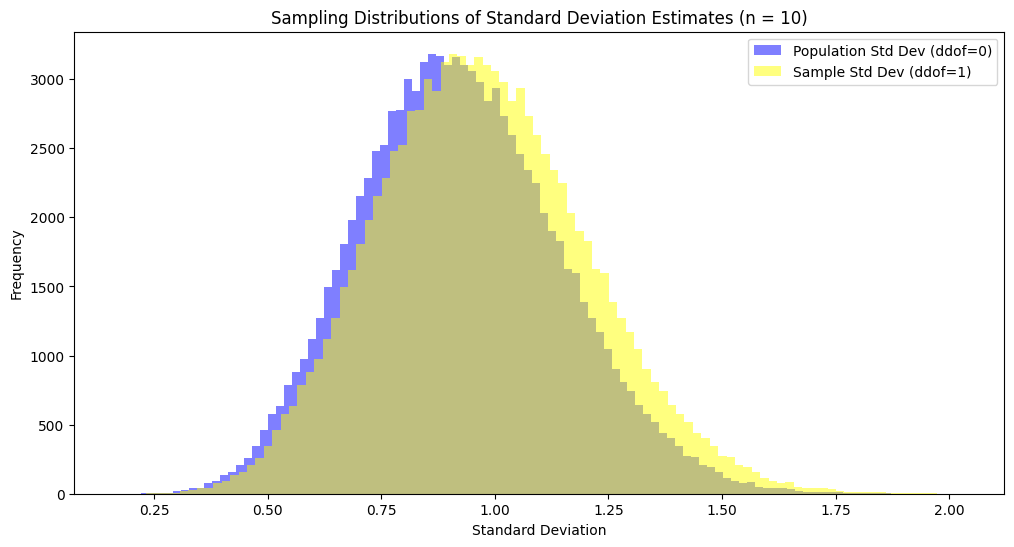

In [5]:
# The first step is to generate 100,000 samples of size 10 from the standard normal distribution using NumPy's random.normal function.
data = np.random.normal(size=(100000, 10))

# We compute the Standard deviation with ddof=0 , an biased estimator for the population standard deviation.
std_population = np.std(data, axis=1, ddof=0)
# We compute the Standard deviation with ddof=1, an unbiased estimator for the population standard deviation.
std_sample = np.std(data, axis=1, ddof=1)

# Next, we plot histograms of both sets of standard deviations to visually compare them.
plt.figure(figsize=(12, 6))
plt.hist(std_population, bins=100, alpha=0.5, label='Population Std Dev (ddof=0)', color='blue')
plt.hist(std_sample, bins=100, alpha=0.5, label='Sample Std Dev (ddof=1)', color='yellow')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Sampling Distributions of Standard Deviation Estimates (n = 10)')
plt.show()

### Discussion on the Results


In the histogram , we observe that the two bell-shaped curves overlap heavily, a clear difference is notable in the shift of their peaks. Both distributions are centered near 1, which is the true standard deviation of the standard normal distribution.  The distribution of the standard deviations computed with `ddof=1` (sample standard deviation) is slightly shifted to the right, while the distribution computed with `ddof=0` (population standard deviation) is slightly shifted to the left.  
The `ddof=0` distribution slightly shifted left shows the histogram peaks at around 0.95, shows that this estimator tends to underestimate the true standard deviation when the sample size is small. In contrast, the values calculated with `ddof=1` are centred closer to 1, because dividing by n-1 corrects for the loss of one degree of freedom when the sample mean is estimated.
These results illustrate the effect of the `ddof` argument on standard deviation estimates. Because the sample mean is estimated from the data, one degree of freedom is lost, and using `ddof=1` produces slightly larger and more accurate estimates than `ddof=0`, which divides by \( n \). The histograms clearly demonstrate this difference.  
These results are consistent with the empirical rule for normal distributions. The simulation provides empirical evidence that the `ddof=1` estimator better reflects the true spread of the underlying population when the sample size is small. As the sample size increase, the difference between the two estimator is expected to diminish, and both will converge toward the true population standard deviation.  

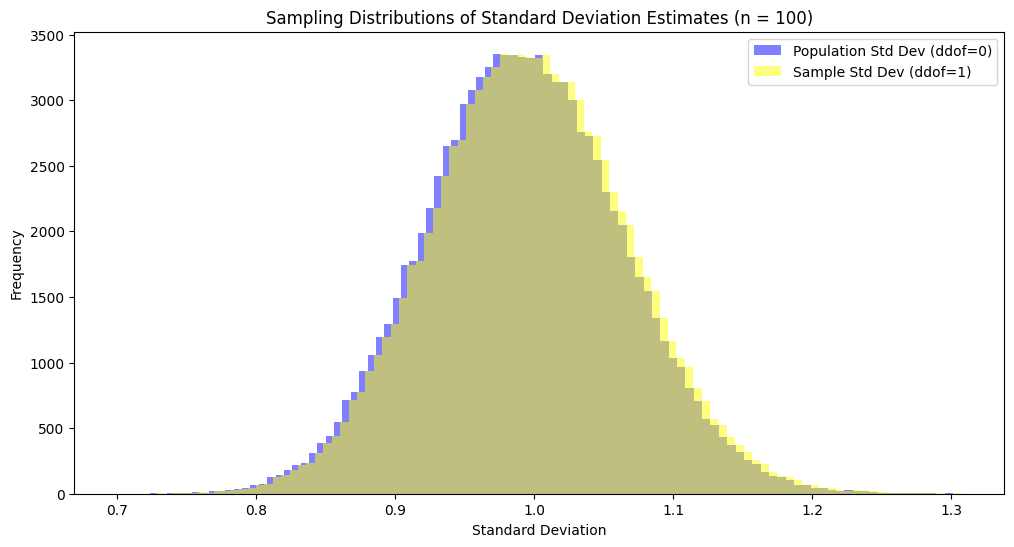

In [6]:
# We look at how this changes with larger sample sizes by repeating the process for samples of size 100.
# The easist way to demonstrate this is to repeat the simulation with a larger sample size.   

data2 = np.random.normal(size=(100000, 100))
# We compute the Standard deviation with ddof=0 , an biased estimator for the population standard deviation.
std_pop_n100 = np.std(data2, axis=1, ddof=0)
# We compute the Standard deviation with ddof=1, an unbiased estimator for the population standard deviation.
std_sample_n100 = np.std(data2, axis=1, ddof=1)
# Next, we plot histograms of both sets of standard deviations to visually compare them.
plt.figure(figsize=(12, 6))
plt.hist(std_pop_n100, bins=100, alpha=0.5, label='Population Std Dev (ddof=0)', color='blue')
plt.hist(std_sample_n100, bins=100, alpha=0.5, label='Sample Std Dev (ddof=1)', color='yellow')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Sampling Distributions of Standard Deviation Estimates (n = 100)')
plt.show()

### Discussion on changing the sample size

When the sample size increase to n = 100, the histograms nearly overlap each other. The sampling distributions for `ddof=0` and `ddof=1` and the peaks seem nearly identical. For larger sample sizes, this confirms that dividing by n or n-1 produce a very similar result. Using a bias of `ddof=0` is only really noticeable in a small sample. The height of the histogram bars increases also, the frequency changes from approximately 3000 using sample size 10 to 3500 using sample size 100. When the data is tightly clustered, more values fall into fewer bins. We notice in the original plot, when n = 10, the standard distributions spread across many bins, frequencies were lower at around a maximum of 3200. When n = 100, the standard distributions fall into a narrower band, some bins are  more crowded because frequencies increase with a maximum of 3600. 

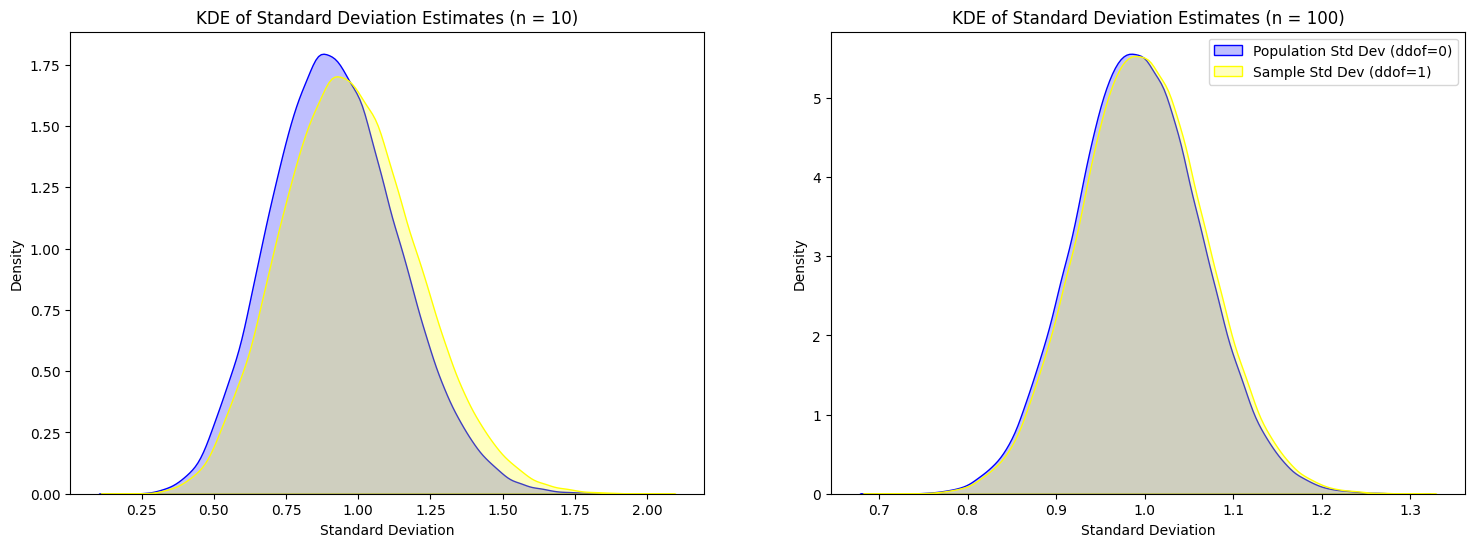

<Figure size 640x480 with 0 Axes>

In [7]:
# In this section, I create another plot to show the two distributions side by side for better comparison.
# I use seaborn's kdeplot function to create kernel density estimates (KDEs) for both sets of standard deviations.


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Plot for n = 10
sns.kdeplot(std_population, ax=axes[0], color='blue', label='Population Std Dev (ddof=0)', fill=True)
sns.kdeplot(std_sample, ax=axes[0], color='yellow', label='Sample Std Dev (ddof=1)', fill=True)
axes[0].set_title('KDE of Standard Deviation Estimates (n = 10)')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Density')

# Plot for n = 100
sns.kdeplot(std_pop_n100, ax=axes[1], color='blue', label='Population Std Dev (ddof=0)', fill=True)
sns.kdeplot(std_sample_n100, ax=axes[1], color='yellow', label='Sample Std Dev (ddof=1)', fill=True)
axes[1].set_title('KDE of Standard Deviation Estimates (n = 100)')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Density')

plt.legend()
plt.show()
plt.tight_layout()



### Discussion KDE

[KDE](https://www.geeksforgeeks.org/data-science/seaborn-kdeplot-a-comprehensive-guide/) - This describes the KDE plot displayed.
A Kernal Density Estimate plot provides a provides a smooth estimate of the proability density function of continuos data. Unlike histograms , the y-axis represents density rather than frequency, and the total area under each curve is 1. 
For the smaller sample size(n=10), the KDE curves are wider, indicating greater variability in the standard deviation estimates. The curve corresponding to `ddof=0` is slightly shifted to the left, reflecting its tendency to underestimate the true standard deviation for small samples.  
For the larger samples size(n=100), the KDE curves are narrower and almost completely overlap. This shows that as the sample size increses, the standard deviation estimates become more stable and concentrated around the true value of 1. These look like they nearly perfectly overlap each other and the differences become almost negligible.

### Final Conclusion

This simulation demonstrates how the choice of degrees of freedom affects standard deviation estimates, particularly for small sample sizes.  When n is small, using `ddof=0` tends to slightly underestimate the true population standard deviation, while `ddof=1` applies a correction that produces estimates closer to the true value.

As the sample size increases, the variability of the standard deviation estimates decreases, and the difference between `ddof=0` and `ddof=1` becomes negligible. For large samples, both estimators converge to the true population standard deviation. This illustrates why the bias correction matters most for small samples and why sample size plays a key role in statistical estimation.

## Problem 3: t-Tests

### Problem Statement

For different values of the true difference in population means, repeated simulations are used to estimate how often a t-test fails to reject a false null hypothesis. The results are then plotted to show how the Type II error rate decrease as the true difference in mean increases.

In this problem, we will explore how Type II errors behave when comparing two samples of size 100. One sample is drawn from a standard normal distribution, N(0,1) and the other from a normal distribution whose mean is shifted by a value d. For each value of d, new samples are repeatedly generated and an independent two samples t-test is perfomed. We record how often the test fails to reject the null hypothesis which allows us to examine how the Type II error rate changes as the true mean difference between the populations increase.

As in previous problems, we begin by defining the null hypothesis. The null hypothesis states that there is no real difference between the two population means, meaning any observed difference is due to random sampling variation. Formally, the null hypothesis is $$H_0 : \mu_1 = \mu_2$$ where $$ H_0 $$ is the null hypothesis and $$ \mu_1 $$ represents the true population mean of group A(drawn from the standard normal distribution where the true mean is 0) and $$ \mu_2 $$ represents the true population of groub b(drawn from a normal distribution with mean d, so its true mean is d). We choose a paramater for d, and let it take different values. When d = 0 , both samples come from identical distribution, but as d increases , we expect the populations to become more separated.

[Type II Error](https://corporatefinanceinstitute.com/resources/data-science/type-ii-error/#:~:text=%22False%20negative%22%20error,Increase%20the%20sample%20size) - A type II error occurs when a hypothesis test fails to reject the null hypothesis even though it is false.  This is also known as a false negative. An example in real life would be, if you were to test someone for diabetes and they were incorrectly diagnosed as not having diabetes when they actually have it, the danger being they are not being treated for an illness that they have. The test misses a real effect or difference. In the context of this problem, the Type II error means failing to detect a true difference between the two population means when such a difference is present. When the value of d is small, the populations are very similar and the test has difficulty distinguishing between them, leading to a higher Type II rate. As d increases and the true difference between the populations becomes larger, the test becomes more likely to reject the null hypothesis, and the Type II error rate decreases.

In [8]:
# Set up the parameters 

n =100 # This is the sample size in each group
n_simulations  = 1000 # This is the number of simulations
np. random.seed(42) # Set seed for reproducibility

d_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Different mean values to test 

results = [] # Empty list to store the results d an its false negative rate

for d in d_values: # Loop over each effect size d
    false_negatives = 0 # Counter for false negatives
    for i in range(n_simulations): # Loop over the number of simulation, repeate the experiment for each effect size d
        # Group A taken from standard normal distribution where location(mean)=0 and scale=1 and sample size n=100
        group_A = np.random.normal(loc=0, scale=1, size=n)
    
        # Group B taken from normal distribution where location=d and scale=1 and sample size n=100
        group_B = np.random.normal(loc=d, scale=1, size=n)
    
        # Perform a two-sample t-test
        t_stat, p_value = stats.ttest_ind(group_A, group_B)
        # Check if the test fails to reject the null hypothesis (p-value > 0.05)
        if p_value > 0.05:
            false_negatives += 1
    # Calculate the false negative rate(Type II error), the number of time we fail to reject the null hypothesis divided by the total number of simulations
    false_negative_rate = false_negatives / n_simulations
       # Store the results
    results.append((d, false_negative_rate))
# Print the results in a formatted table
print("| Effect Size (d) | False Negative Rate |")
print("|-----------------|---------------------|")
for d, false_negative_rate in results:
   print(f"| {d:<15.1f} | {false_negative_rate:<19.4f} |")


| Effect Size (d) | False Negative Rate |
|-----------------|---------------------|
| 0.0             | 0.9400              |
| 0.1             | 0.9040              |
| 0.2             | 0.6950              |
| 0.3             | 0.4500              |
| 0.4             | 0.1770              |
| 0.5             | 0.0640              |
| 0.6             | 0.0180              |
| 0.7             | 0.0010              |
| 0.8             | 0.0000              |
| 0.9             | 0.0000              |
| 1.0             | 0.0000              |


### Discussion

In this problem, the null hypothesis is that there is no difference between the two population means. When d = 0, both samples come from identical distributions, and the null hypothesis is true. In this case , the test fails to reject the null hypothesis approximately 94% of the time. As d increases, the populations become more separate, and the probability of failing to reject the null hypothesis decreases. For significantly large values of d, the false negative rate approaches zero, this indicates that the t-test almost always rejects the null hypothesis when a real difference exists.
The false negative rate(Type II error rate) represents the probability that a statistical test fails to reject the null hypothesis even though a true difference between the population mean exists. In this simulation, the false negative occurs when the independent samples t-test does not detect a real mean diffence d > 0. This shows us how sensitive the t-test is to differences of various sizes . When the true mean difference d is small, it is difficult for the test to distinguish between them and the false negative rate is high. As d increases, the populations become more separate, and the false negative rate decreases. It indicates that the test is more likely to correctly reject the null hypothesis. The impact of the false negative rate, can have serious consequences in real-world applications, such as medical testing. It is important to understand the false negative rate changes , so that we can check if the the t-test is reliable and the power of the test.


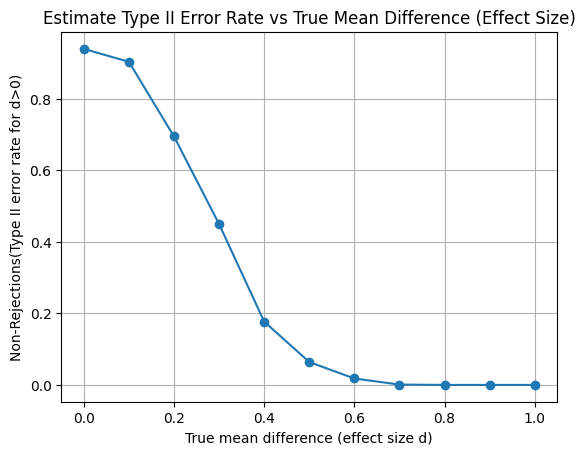

In [9]:
# Create a plot of the results to visualize the relationship between effect size and false negative rate
plt.plot([d for d, _ in results], [rate for _, rate in results], marker='o')
plt.xlabel("True mean difference (effect size d)")
plt.ylabel("Non-Rejections(Type II error rate for d>0)")
plt.title("Estimate Type II Error Rate vs True Mean Difference (Effect Size)")
plt.grid(True)
plt.show()

### Discussion on Plot

In this simulation , the true mean difference between the two populations is represented by the parameter d. This plot shows the estimated Type II error rate which is how often the t-test fails to detect a real difference as the true mean difference increases. When the d is small, the Type II error rate is high, indicating that the t-test fails to detect a d fifference between the two population means. As d increases, the populations become more separated, and the Type II error rates decreases rapidly. For larger values of d we can see that the Type II error rate is approximately zero. This demonstrates that the power of the t-test increases as the true effect size increases. 

### Conclusion

In the problem, I used a simulation-based approach to examine how the Type II error rate of an independent samples t-test depends on the true difference between two population means. I generated repeated samples from a standard normal distribution and from a normal distribution with a shifted mean. This allowed me to to control how different the two populations were and observe how often the t-test failed to detect the difference.  
The results show that when the true difference between the population means is small, the Type II error rate is high, meaning that the t-test often misses real differences. The t-test does not know the true mean difference, and when the effect size is small, sampling noise can hide the difference. In these cases, the observed difference may be due to random chance, so the null hypothesis is not rejected.  
As the true mean difference increases , the population means move further apart, the observed difference becomes large relative to the variability, and a smaller p value so it rejects the null hypothesis more often. When the true difference is small, the two groups look similar in many samples, but when the difference is large, the test is more likely to detect it.  
Overall, this simulation highlights the importance of effect size in hypothesis testing and shows that failing to reject the null hypothesis does not necessarily mean that no difference exists.  

## Problem 4: Anova

### Problem Statement

This problem uses simulated data to compare one-way ANOVA with multiple two-sample t-tests when testing for differences among three group means. Three independent samples (n=30 each) are generated from normal distributions with means 0, 0.5, and 1 (SD=1). A one-way ANOVA and pairwise t-tests are then performed and the conclusions are compared.  
In this problem, we will look at [ANOVA](https://www.youtube.com/watch?v=0NwA9xxxtHw) - this video explains that Anova is a test that can be used when there are more than two samples.  ANOVA stands for analysis of variance and tests whether there are statistically significant differences between 3 or more population means. It is closely related to the t-test, we are doing the same things but going about it in a different way. The article [anova v t-tests](https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/) explains the difference between these approaches. When comparing more than two population means, ANOVA is often preferred over multiple two-sample t-tests because it controls the Type I error rate, whereas running multiple t-tests increase the probability of at least one false rejection.
In the previous problem, we examined Type II errors. In contrast, this problem highlights Type I errors(or false positive errors). A [Type 1 error](https://corporatefinanceinstitute.com/resources/data-science/type-i-error/) occurs when a test incorrectly rejects a true null hypothesis. This piece explains that a Type I error falsely infers the existence of a phenomenon that does not exist. In hypothesis testing , it is not possible to completely eliminate the probability of a Type I error fully. Even with a well designed t-test, we can have type I errors due to random chance inherent in sampling,  The standard significance level(alpha, $\alpha$) is typically set at 0.05 meaning there is a 5% chance of a Type 1 error(a false positive) by random chance alone. This probability increases when you conduct multiple t-tests on the same data set. If ANOVA shows a significant result, post-hoc tests like Tukey's HSD are required to determine which group means differ.

In [10]:
# I generate three independent samples from normal distributions with means of 0,0.5 and 1.0 respectively, each with a standard deviation of 1 and a sample size of 30.

np.random.seed(0)

sample_a = np.random.normal(loc=0.0, scale=1.0, size=30)
sample_b = np.random.normal(loc=0.5, scale=1.0, size=30)
sample_c = np.random.normal(loc=1.0, scale=1.0, size=30)



The f-test statistic is a test statistic used in ANOVA and regression analysis that measures the ratio of the variation between group means to the variation within the groups.
[f-statistic](https://www.machinelearningplus.com/statistics/f-statistic-formula-explained/) - This article explains how the F-statisic compares how much the group means differ from each other (between-groups variability) to how much variation exists within each group.
$$
F
=
\frac{\text{Mean Square Between Groups (explained variability)}}
     {\text{Mean Square Within Groups (unexplained variability)}}
$$

If the f-statistic is near 1 , the variation between group means is similar to the variation within groups, suggesting that the observed differences are likely due to random chance. If the F-statistic is large(significantly greater than 1), the variation between groups means is much larger than the variation within groups, providing evidence to reject the null hypothesis and suggesting that at least one group mean is significantly different from the others.

We look at the p-value, a small p-value( <0.05 ) indicates the result is statistically significant.

In [11]:
# I perform a one-way ANOVA test to determine whether all three samples means are equal. One-way ANOVA compares the means of multiple groups based on a single independent variable. The null hypothesis is that all group means are equal, and the alternative hypothesis is that at least one group mean is different.

# The f-test statistic and p-value are calculated using SciPy's stats.f_oneway function. 

f_statistic, p_value = stats.f_oneway(sample_a, sample_b, sample_c)

# Show the results
print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")

F-statistic: 3.3415, p-value: 0.0400


The F-statistic is 3.3415 with a p-value of 0.04 . This result is statistically significant at the standard α = 0.05 level because the p-value is less than 0.05. Therefore, we should reject the null hypothesis and conclude there is a statistically significant difference between the means of at least one of the samples.


In [12]:
# As the  the p-value is less than 0.05, indicating that we can reject the null hypothesis and conclude that at least one of the sample means is significantly different from the others.
# I will perform a post-hoc test (Tukey's HSD) to determine which specific groups differ from each other.

res = stats.tukey_hsd(sample_a, sample_b, sample_c)

# The Tuksy HSD output labels the groups numerically, where group 0 corresponds to sample_a, group 1 to sample_b, and group 2 to sample_c.
print ("Group mapping:  0 = sample_a, 1 = sample_b, 2 = sample_c\n")
          
# Show the results
print(res)


Group mapping:  0 = sample_a, 1 = sample_b, 2 = sample_c

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.232     0.640    -0.381     0.846
 (0 - 2)     -0.423     0.232    -1.037     0.190
 (1 - 0)     -0.232     0.640    -0.846     0.381
 (1 - 2)     -0.656     0.033    -1.269    -0.042
 (2 - 0)      0.423     0.232    -0.190     1.037
 (2 - 1)      0.656     0.033     0.042     1.269



In the Tukey HSD output, the results indicate a statistically significant difference between samples 1-2(or 2-1 /  sample_b and sample_c). No statistically significant differences were observed between samples 0 and 1 or between samples 0 and 2.  
A pairwise difference is considered statistically significant if the 95% confidence interval does not include zero, since zero corresponds to no difference between the group means. For the comparison between sample_b and sample_c, the confidence interval ranges from .042 to 1.269, we do not pass through 0. In contrast, the others are centred around zero -0.381 to 0.846 and -.190 to 1.037, indicating no significant differences.  
In summary, the one-way ANOVA indicated a statistically significant difference among the three group means. The Tukey HSD post-hoc test showed that this difference is driven solely by the comparison between sample_b(1) and sample_c(2). We therefore reject the null hypothesis of equal means for this pair, but we do not reject the null hypothesis for the comparisons between sample_a and sample_b nor for sample_a and sample_c.

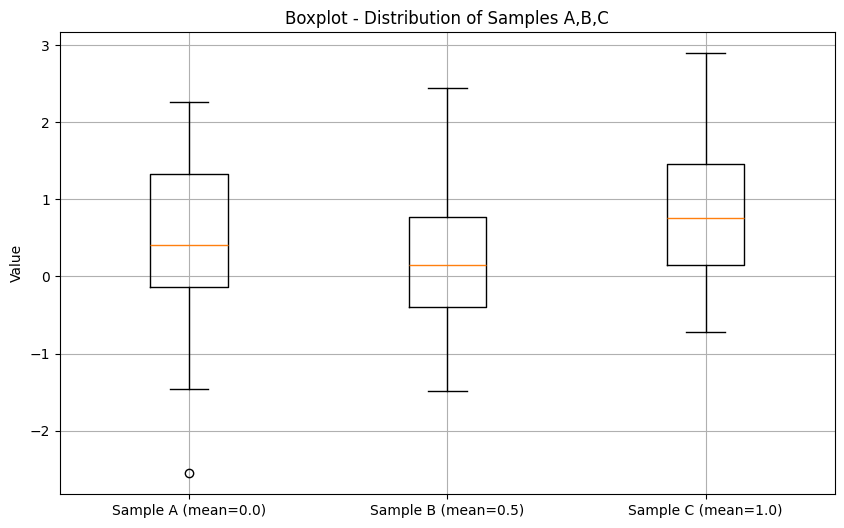

In [13]:
# In this section, we compare the distributions of the three samples A,B and C using a boxplot for better comparison.
# A boxplot provides a graphical summary each sample by displaying the median, interquartile range, and potential outliers, making it useful for comparing distributions across multiple groups - quote [NIST](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/boxplot.htm).
# [Boxplots](https://www.youtube.com/watch?v=nV8jR8M8C74) - This video provides a clear explanation of boxplots, including how to interpret the minimum, first quartile, median, third quartile, maximum values and the outliers or whiskers
# What the box plot will show us is : the median values of each sample(this is the line inside each box), the box itself represents the interquartle range, which contains the middle 50% of the data points. and the whiskers extend to show the range from the minimum to the maximum values.

data = [sample_a, sample_b, sample_c]
labels = ['Sample A (mean=0.0)', 'Sample B (mean=0.5)', 'Sample C (mean=1.0)']

plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=labels)
plt.title('Boxplot - Distribution of Samples A,B,C')
plt.ylabel('Value')
plt.grid(True)
plt.show()

          



### Discussion on Plot

In this plot , we look at the three samples, sample A,B and C. The boxplot shows the distributions of these samples. There is considerable amount of overlap among the three groups, indicating variability within each sample.  

The visual pattern is consistent with Tukey's HSD test , which identifies a statistically significant difference only between samples B and C. In this comparison, the difference in medians is more apparent, while the distributions of Samples A and B and Samples A and C overlap strongly, supporting the lack of statistically significant differences for those pairs.

Overall, the boxplot provides a visual confirmation of the statistical results, showing that while the group distributions overlap substantially, the difference between Samples B and C is the most pronounced, consistent with the ANOVA and Tukey HSD findings.

In [14]:
# In this secion, I will perform three independent two-sample t-tests to compare the means of each pair of samples (A vs B, A vs C, and B vs C).
_, p_value_ab = stats.ttest_ind(sample_a, sample_b)
_, p_value_ac = stats.ttest_ind(sample_a, sample_c)
_, p_value_bc = stats.ttest_ind(sample_b, sample_c)

print(f"P-value for Sample A vs Sample B: {p_value_ab:.4f}")
print(f"P-value for Sample A vs Sample C: {p_value_ac:.4f}")
print(f"P-value for Sample B vs Sample C: {p_value_bc:.4f}")

# Running three independent tests at alpha  = 0.5 increases the chance of a Type I error (false positive) beyond 5%.


P-value for Sample A vs Sample B: 0.3773
P-value for Sample A vs Sample C: 0.1185
P-value for Sample B vs Sample C: 0.0090


The results of the three independent two-sample tests are consistent with the one-way ANOVA test. The ANOVA test rejected the null hypothesis that all three means are equal. Among the pairwise t-tests, only the comparison between samples B and C is statistically significant (p=0.009), indicating that this difference is driving the overall ANOVA result. 

In [15]:
# We can compare the p-values from the t-tests to the p-value from the ANOVA test.

alpha = 0.05
# ANOVA
_, p_value_anova = stats.f_oneway(sample_a, sample_b, sample_c)
# Pairwise t-tests
_, p_value_ab = stats.ttest_ind(sample_a, sample_b)
_, p_value_ac = stats.ttest_ind(sample_a, sample_c)
_, p_value_bc = stats.ttest_ind(sample_b, sample_c)

results = pd.DataFrame({
    'Test': ['ANOVA', 'T-test A vs B', 'T-test A vs C', 'T-test B vs C'],
    'p-value': [p_value_anova, p_value_ab, p_value_ac, p_value_bc],    
    'Reject H0 (α=0.05)': [p_value_anova < alpha, p_value_ab < alpha, p_value_ac < alpha, p_value_bc < alpha]
})
print(results)

            Test   p-value  Reject H0 (α=0.05)
0          ANOVA  0.039981                True
1  T-test A vs B  0.377301               False
2  T-test A vs C  0.118493               False
3  T-test B vs C  0.009022                True


### Conclusion:
At α=0.05, the one-way ANOVA p-value( 0.03998) is below 0.05, so we reject the null hypothesis that all three means are equal and conclude that at least one group mean differs. The pairwise t-tests show no significant difference for A vs B(p = 0.377) or A vs C(p = 0.118), but B vs C is statistically significant(p=0.009). This is consistent with the Tukey HSD post-hoc test, which also identified a significant difference only between samples B and C. These results indicate that the overall ANOVA significance is driven by the difference between samples B and C.  
ANOVA is prefered to multiple t-tests because it performs a single global test at the chosen significance level(e.g., 0.05), thereby controlling the overall Type I error rate. Running multiple pairwise t-tests increases the probability of at least one false positive. If pairwise differences are needed after a significant ANOVA, post-hoc methods such as Tukey's HSD adjust for multiple comparisons.

### Final Remark

Overall, this project used simulation and hypothesis testing to illustrate key statisical concepts, including bias in estimation, Type I and Type II errors, statistical power, and the importance of choosing appropriate tests. Together, the problems demonstrate how sample size, effect size, and experimental design influence statistial conclusions.

![abacus](img/abacus.jpg)

-----------------------------------
# END

